In [5]:
!pip install tensorflow



    100% |████████████████████████████████| 62.0MB 767kB/s ta 0:00:011
    100% |████████████████████████████████| 3.1MB 2.3MB/s ta 0:00:01
    100% |████████████████████████████████| 102kB 1.6MB/s a 0:00:011
    100% |████████████████████████████████| 1.2MB 1.8MB/s ta 0:00:01
    100% |████████████████████████████████| 2.0MB 3.5MB/s ta 0:00:011
    100% |████████████████████████████████| 92kB 2.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for absl-py ... done
  Stored in directory: /Users/zhifei/Library/Caches/pip/wheels/18/ea/5e/e36e1b8739e78cd2eba0a08fdc602c2b16a4b263912af8cb64
Successfully built absl-py


In [3]:
import numpy
import pandas
import keras
import collections
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
seed = 7
numpy.random.seed(seed)

ModuleNotFoundError: No module named 'keras'

In [10]:
print('preparing data...')
df_x_train = pd.read_csv('template.csv')
df_y_train = pd.read_csv('y_train.csv', header=0, index_col = 0)
X = df_x_train.values
y = df_y_train['y'].values
df_x_test = pd.read_csv('X_test.csv', header=0, index_col = 0)
X_test = df_x_test.values

preparing data...


In [ ]:
count = collections.Counter(y)
max_class = 0
for c in range(0,4):
    if count[c] > max_class:
        max_class = count[c]

class_weight = np.zeros(4)
for c in range(0,4):
    if count[c] > 0:
        class_weight[c] = float(max_class) / float(count[c])
weights = np.zeros((len(y)), dtype='float')
for i in range(0,len(y)):
    weights[i] = class_weight[y[i]]

In [15]:
feature_size=len(X[0])
max_wav = np.amax(np.vstack((X[:, 0:feature_size], X_test[:, 0:feature_size])))
min_wav = np.amin(np.vstack((X[:, 0:feature_size], X_test[:, 0:feature_size])))
X[:, 0:feature_size] = ((X[:,0:feature_size] - min_wav) / (max_wav - min_wav))
X_test[:, 0:feature_size] = ((X_test[:,0:feature_size] - min_wav) / (max_wav - min_wav))

array([[-157., -157., -157., ...,   nan,   nan,   nan],
       [ -34.,  -34.,  -33., ...,   nan,   nan,   nan],
       [-276., -275., -274., ...,   nan,   nan,   nan],
       ...,
       [ -22.,  -18.,  -11., ...,   nan,   nan,   nan],
       [ 136.,  150.,  161., ...,   nan,   nan,   nan],
       [ -31.,  -34.,  -36., ...,   nan,   nan,   nan]])

In [ ]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
def baseline_model():

    model = Sequential()
    model.add(Dense(5, input_dim=50, activation='relu'))
    model.add(Dropout(rate= 0.1))
    model.add(Dense(10,activation = 'relu'))
    model.add(Dropout(rate = 0.1)) 
    model.add(Dense(30,activation = 'relu'))
    model.add(Dropout(rate = 0.1)) 
    model.add(Dense(50,activation = 'relu'))
    model.add(Dropout(rate = 0.1)) 
    model.add(Dense(30,activation = 'relu'))
    model.add(Dropout(rate = 0.1)) 
    model.add(Dense(10,activation = 'relu'))
    model.add(Dropout(rate = 0.1)) 
    model.add(Dense(5,activation = 'relu'))
    model.add(Dropout(rate = 0.1)) 
    model.add(Dense(4, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],loss_weights=class_weight)
    return model

In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [ ]:
 cross_val_score(estimator, X, dummy_y, scoring='f1_micro',cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

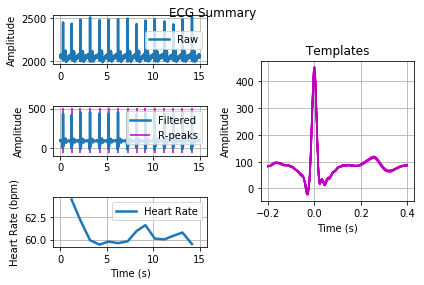

In [7]:
#clf = svm.SVC( random_state=0,class_weight='balanced',kernel='rbf',gamma=1 / (1000 * X.std()))

''''clf=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(5, 2),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
clf.fit(X, y) 
cross_val_score(clf, X, y, scoring='f1_micro', cv=5)  ''''

In [9]:
y_pred =estimator.predict(X_test)

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
f = open("submission.csv", "w")
f.write("id,y\n")
for i,x in enumerate(y_pred):
    f.write("{},{}\n".format(i,y_pred[i]))
f.close()
